# Lab Segmentation 1

In [105]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
## For all requirements: The quality of the results is evaluated.


# 1- Read the image 
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)

# read image golf

# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)



# 3- Visually (not by code) detect the dominating color channel (C) for the background (R, G or B)
# Answer: Visually by showing the original image the dominating color channel is the Green channel.


# channels of the image

# intensity_r = np.mean(golf_img_r)
# intensity_g = np.mean(golf_img_g)
# intensity_b = np.mean(golf_img_b)

# show_images([golf_img_r, golf_img_g, golf_img_b], [f"Red Channel (Intensity: {intensity_r})", f"Green Channel (Intensity: {intensity_g})", f"Blue Channel (Intensity: {intensity_b})"])

# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)


# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
# have larger values than the other channels with an appropriate threshold




# # 6- display the binarized image




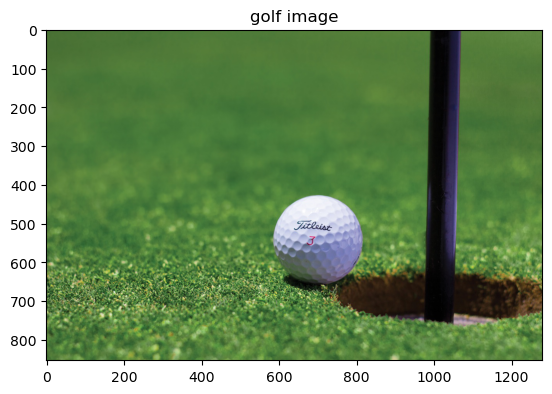

In [107]:
golf_img_org = io.imread('imgs/exp1/golf.jpeg')
show_images([golf_img_org], ['golf image'])
golf_img = golf_img_org.astype(float)

In [108]:
golf_img_r = golf_img[:,:,0]
golf_img_g = golf_img[:,:,1]
golf_img_b = golf_img[:,:,2]

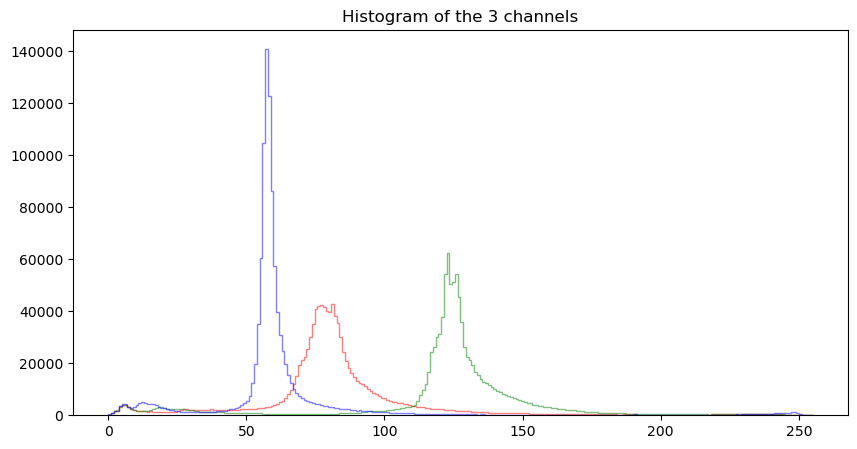

/home/amir/anaconda3/lib/python3.12/site-packages/skimage/_shared/utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


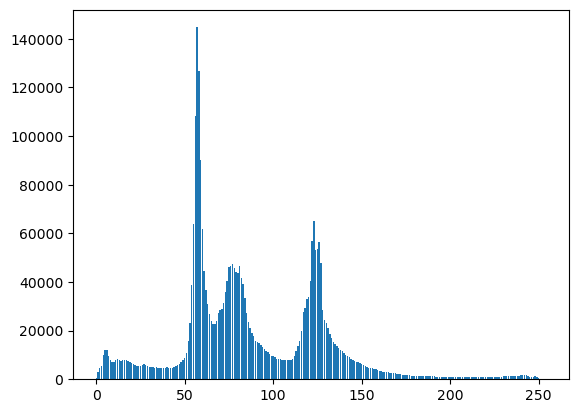

In [109]:
# histogram of the image
plt.figure(figsize=(10, 5))
plt.title("Histogram of the 3 channels")
plt.hist(golf_img_r.ravel(), bins=256, color='r', alpha=0.5, label='R', histtype='step')
plt.hist(golf_img_g.ravel(), bins=256, color='g', alpha=0.5, label='G', histtype='step')
plt.hist(golf_img_b.ravel(), bins=256, color='b', alpha=0.5, label='B', histtype='step')
plt.show()

showHist(golf_img)

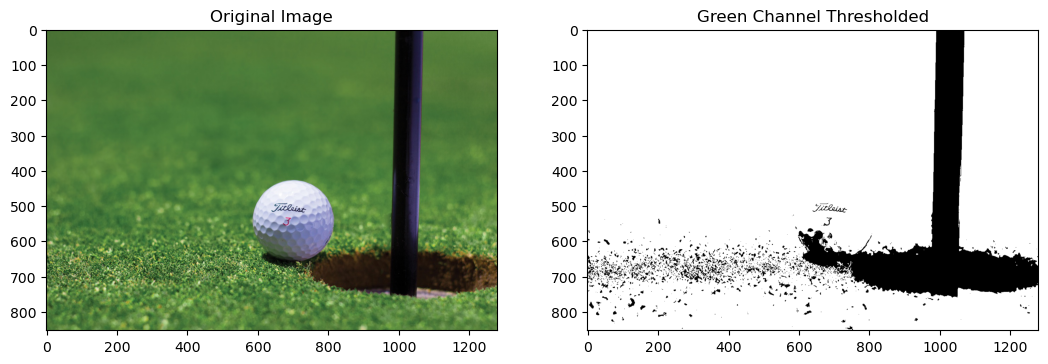

In [110]:
THRESHOLD = 100

golf_img_g_thresholded = golf_img_g > THRESHOLD

show_images([golf_img_org, golf_img_g_thresholded], ['Original Image', 'Green Channel Thresholded'])


In [111]:
threshold = 25  # Example threshold value to exclude small differences
mask = (golf_img_g > golf_img_r + threshold) & (golf_img_g > golf_img_b + threshold)

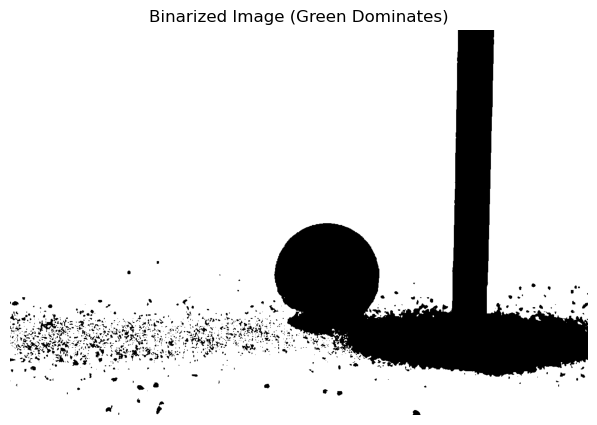

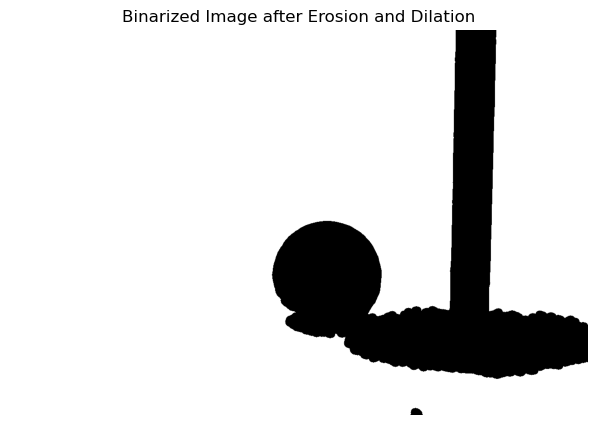

In [112]:
from skimage.morphology import binary_erosion, binary_dilation, disk

plt.figure(figsize=(10, 5))
plt.imshow(mask, cmap='gray')
plt.title("Binarized Image (Green Dominates)")
plt.axis('off')
plt.show()

# binarized image after erosion and dilation
dilation_mask = binary_dilation(mask, disk(5))
erosion_mask = binary_erosion(dilation_mask, disk(10))

plt.figure(figsize=(10, 5))
plt.imshow(erosion_mask, cmap='gray')
plt.title("Binarized Image after Erosion and Dilation")
plt.axis('off')
plt.show()


In [113]:
# 1- Get the required RGB color (Using a color picker)


# 2- Read image

# 3- extract R, G and B channels (as float)

# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)

# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)

# 6-  create a mask by thresholding the differences

# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40

# 8- show the image or save it


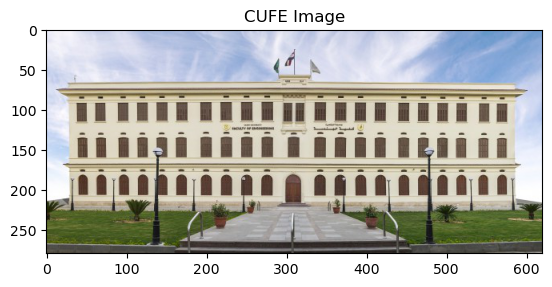

In [114]:
cufe_img_org = io.imread('imgs/exp2/cufe.png')
cufe_img = cufe_img_org.astype(float)

show_images([cufe_img_org], ['CUFE Image'])

In [115]:
cufe_img_r = cufe_img[:,:,0]
cufe_img_g = cufe_img[:,:,1]
cufe_img_b = cufe_img[:,:,2]

In [116]:
GRASS_COLOR = [50, 100, 40]
REQUIRED_COLOR = [230, 90, 40]

difference_r = cufe_img_r - GRASS_COLOR[0]
difference_g = cufe_img_g - GRASS_COLOR[1]
difference_b = cufe_img_b - GRASS_COLOR[2]

In [117]:
difference = np.sqrt(difference_r**2 + difference_g**2 + difference_b**2)
# difference = np.abs(difference_r) + np.abs(difference_g) + np.abs(difference_b)

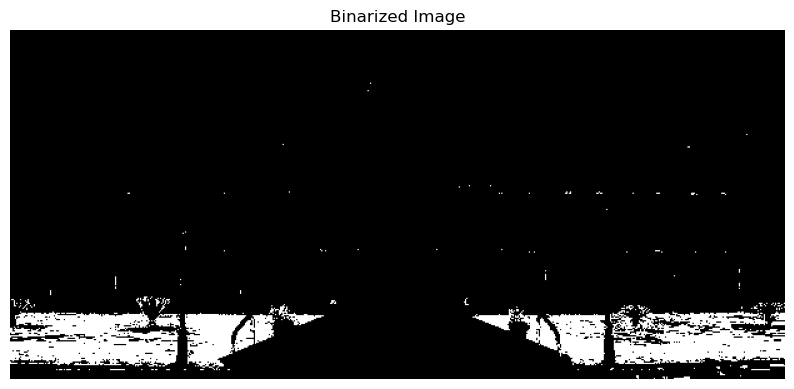

In [118]:
THRESHOLD = 42
mask = difference < THRESHOLD

plt.figure(figsize=(10, 5))
plt.imshow(mask, cmap='gray')
plt.title("Binarized Image")
plt.axis('off')
plt.show()

In [119]:
cufe_img_edited = cufe_img_org.copy()
cufe_img_edited[mask] = REQUIRED_COLOR

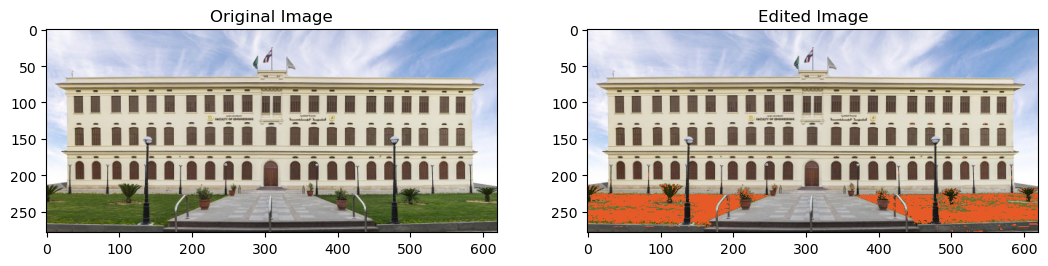

In [120]:
show_images([cufe_img_org, cufe_img_edited], ['Original Image', 'Edited Image'])